In [1]:
import sys, os
sys.path.append("..")
import numpy as np
import common as com
import sys as sys
import os as os
import fisher_plot as fsh
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Make plot and temp ini file directories

plots_dir = "/group/hepheno/smsharma/GoFish/LSST_nu/plots/"
ini_dir = "/group/hepheno/smsharma/GoFish/LSST_nu/ini_files/"

for d in [plots_dir, ini_dir]:
    if not os.path.exists(d):
        try: os.mkdir(d)
        except OSError as e:
            if e.errno != 17:
                raise
label_size = 20

In [3]:
param_och2 = """
#Cosmological parameters
[och2]
#Fiducial value
x= 0.1197
#Increment used for numerical derivatives
dx= 0.001
#Set to 'no' if this parameter should be keep fixed
is_free= yes
onesided=0

"""

param_obh2 = """
[obh2]
x= 0.02222
dx= 0.0001
is_free= yes
onesided=0

"""

param_ok = """
[ok]
x= 0.0
dx= 0.015
is_free= yes
onesided=0

"""

param_hh = """
[hh]
x= 0.69
dx= 0.01
is_free= yes
onesided=0

"""

param_w0 = """
[w0]
x= -1.0
dx= 0.01
is_free= yes
onesided=0

"""

param_wa = """
[wa]
x=0.0
dx=0.05
is_free= yes
onesided=0

"""

param_As = """
[A_s]
x= 2.1955
dx= 0.01
is_free= yes
onesided=0

"""

param_ns = """
[ns]
x= 0.9655
dx= 0.005
is_free= yes
onesided=0

"""

param_tau = """
[tau]
x=0.06
dx=0.02
is_free= yes
onesided = 0

"""

param_rt = """
[rt]
x=0.00
dx=0.005
is_free= no
onesided = 1

"""

param_mnu = """
[mnu]
x=60.
dx=10.
is_free= yes
onesided = 0

"""

param_pan = """
[pan]
x=0.
dx=0.02
is_free= no
onesided = 1

"""

param_lmcb = """
[lmcb]
x=14.08
dx=0.3
is_free= yes
onesided = 0

"""

param_etab = """
[etab]
x=0.5
dx=0.1
is_free= yes
onesided = 0

"""

param_lksb="""
[lksb]
x=1.7404
dx=0.2
is_free= yes
onesided = 0

"""

tracer_cmb_primary_nos4 = """
[Tracer 1]
tracer_name= CMB_exp
tracer_type= cmb_primary
#Has temperature?
has_t= yes
#Has polarization?
has_p= yes
#Noise level in temperature in units of uK-arcmin in the two ell regimes
sigma_t= 31.13 31.13
#Noise level in polarization in units of uK-arcmin in the two ell regimes
sigma_p= 200.94 56.9402
#Beam size in units of arcmin in the two ell regimes
beam_amin= 10.0 7.0 
#Ell value that marks the transition
l_transition= 50
#Minimum ell
lmin= 2
#Maximum ell
lmax= 3000 
use_tracer= yes

"""

tracer_cmb_primary_cvnos4 = """
[Tracer 1]
tracer_name= CMB_exp
tracer_type= cmb_primary
#Has temperature?
has_t= yes
#Has polarization?
has_p= yes
#Noise level in temperature in units of uK-arcmin in the two ell regimes
sigma_t= 2.83 31.13
#Noise level in polarization in units of uK-arcmin in the two ell regimes
sigma_p= 4.0 56.9402
#Beam size in units of arcmin in the two ell regimes
beam_amin= 30.0 7.0 
#Ell value that marks the transition
l_transition= 50
#Minimum ell
lmin= 2
#Maximum ell
lmax= 3000 
use_tracer= yes

"""

tracer_cmb_primary_cv = """
[Tracer 1]
tracer_name= CMB_exp
tracer_type= cmb_primary
#Has temperature?
has_t= yes
#Has polarization?
has_p= yes
#Noise level in temperature in units of uK-arcmin in the two ell regimes
sigma_t= 2.83 1.0
#Noise level in polarization in units of uK-arcmin in the two ell regimes
sigma_p= 4.0 1.4
#Beam size in units of arcmin in the two ell regimes
beam_amin= 30.0 3.0 
#Ell value that marks the transition
l_transition= 50
#Minimum ell
lmin= 2
#Maximum ell
lmax= 3000 
use_tracer= yes

"""

tracer_cmb_primary = """
[Tracer 1]
tracer_name= CMB_exp
tracer_type= cmb_primary
#Has temperature?
has_t= yes
#Has polarization?
has_p= yes
#Noise level in temperature in units of uK-arcmin in the two ell regimes
sigma_t= 31.13 1.0
#Noise level in polarization in units of uK-arcmin in the two ell regimes
sigma_p= 150.0 1.4
#Beam size in units of arcmin in the two ell regimes
beam_amin= 10.0 3.0 
#Ell value that marks the transition
l_transition= 50
#Minimum ell
lmin= 2
#Maximum ell
lmax= 3000 
use_tracer= yes

"""

tracer_cmb_lensing = """
[Tracer 2]
tracer_name= CMB_exp_lensing
tracer_type= cmb_lensing
#Noise level in temperature in units of uK-arcmin (implicitly scaled by sqrt(2) in polarization)
sigma_t= 1.0
#Beam size in units of arcmin
beam_amin= 3.0
lmin= 30
lmax= 3000
use_tracer= yes

"""

tracer_lensing = """
[Tracer 3]
tracer_name= LSST_gold_sh
tracer_type= gal_shear
bins_file= ../curves_LSST/bins_gold.txt
nz_file= ../curves_LSST/nz_shear_fiducial.txt
abias_file= ../curves_LSST/az_gold_new.txt
rfrac_file= ../curves_LSST/rf_new.txt
sigma_gamma= 0.28
include_m_bias= yes
m_step = 0.005
use_tracer= yes

"""

tracer_clustering_blue = """
[Tracer 4]
tracer_name= LSST_blue_cl
tracer_type= gal_clustering
bins_file= ../curves_LSST/bins_blue.txt
nz_file= ../curves_LSST/nz_blue.txt
bias_file= ../curves_LSST/bz_blue.txt
sbias_file= ../curves_LSST/sz_blue.txt
ebias_file= ../curves_LSST/ez_blue.txt
use_tracer= yes

"""

tracer_clustering_red = """
[Tracer 5]
tracer_name= LSST_red_cl
tracer_type= gal_clustering
bins_file= ../curves_LSST/bins_red.txt
nz_file= ../curves_LSST/nz_red.txt
bias_file= ../curves_LSST/bz_red.txt
sbias_file= ../curves_LSST/sz_red.txt
ebias_file= ../curves_LSST/ez_red.txt
use_tracer= yes

"""

tracer_bao = """
[BAO 1]
# Absolute errors on dV, dA, H
#fname_dv=../curves_DESI/DESI_sigma_dV_1611.txt
fname_da=../curves_DESI/DESI_sigma_dA_1611.txt
fname_hh=../curves_DESI/DESI_sigma_H_1611.txt
#use_relative_errors = yes

"""

class_params = """
[CLASS parameters]
lmax_cmb= 5000
lmax_lss= 5000
lmin_limber= 200
include_alignment= yes
include_rsd= yes
include_magnification= no
include_gr_vel= no
include_gr_pot= no
exec_path=./run_class.sh
use_nonlinear= yes
use_baryons= yes
f_sky= 0.4

"""

output_params = """
[Output parameters]
output_dir= ../outputs_LSST_DESI_lmax5000_IAFix/
output_spectra= run
output_fisher= Fisher

[Behaviour parameters]
model= wCDM
save_cl_files= yes
save_param_files= yes

"""

In [4]:
def get_ini(setup = "fid", desi=False, shear=True, red=False, blue=True, ok=True, w=True, m_bias=True, vary_baryons=True, photoz=True, shear_lmax5000=True, IA_marg=True, sigma_t=1.0):
    """ Get param.ini file for a given spec as defined in the args
    """
    
    param_ini = (param_och2 + param_obh2 + param_ok +
        param_hh + param_w0 + param_wa + 
        param_As + param_ns + param_tau + 
        param_rt + param_mnu + param_pan 
        )
    
    param_ini += (param_lmcb + param_etab + param_lksb).replace("is_free= yes", "is_free= yes" if vary_baryons else "is_free= no")

    tcl = tracer_cmb_lensing.replace("sigma_t= 1.0", "sigma_t= " +str(sigma_t))
    
    
    if setup == "fid":
        tracers_ini = tcl + tracer_cmb_primary
    elif setup == "nos4":
        tracers_ini = tcl.replace("use_tracer= yes", "use_tracer= no") + tracer_cmb_primary_nos4
    elif setup == "cv":
        tracers_ini = tcl + tracer_cmb_primary_cv
    elif setup == "cvnos4":
        tracers_ini = tcl.replace("use_tracer= yes", "use_tracer= no") + tracer_cmb_primary_cvnos4
    elif setup == "nocmb":
        tracers_ini = tcl.replace("use_tracer= yes", "use_tracer= no") + tracer_cmb_primary_nos4.replace("use_tracer= yes", "use_tracer= no")


    if desi: tracers_ini += tracer_bao
    tracers_ini += tracer_lensing.replace("use_tracer= yes", "use_tracer= yes" if shear else "use_tracer= no").replace("include_m_bias= yes", "include_m_bias= yes" if m_bias else "include_m_bias= no").replace("bins_gold.txt", "bins_gold.txt" if shear_lmax5000 else "bins_gold_lmax2000.txt").replace("az_gold_new.txt", "az_gold_new.txt" if IA_marg else "az_gold_new_nomarg.txt")
    tracers_ini += tracer_clustering_red.replace("use_tracer= yes", "use_tracer= yes" if red else "use_tracer= no").replace("bins_red.txt", "bins_red.txt" if photoz else "bins_red_nomarg.txt")
    tracers_ini += tracer_clustering_blue.replace("use_tracer= yes", "use_tracer= yes" if blue else "use_tracer= no").replace("bins_blue.txt", "bins_blue.txt" if photoz else "bins_blue_nomarg.txt")
    tracers_ini += param_ok.replace("is_free= yes", "is_free= yes" if ok else "is_free= no")
    tracers_ini += (param_w0 + param_wa).replace("is_free= yes", "is_free= yes" if w else "is_free= no")
    

    ini_file = param_ini + tracers_ini + class_params + output_params.replace("Fisher", "FisherDellaIAFixedBaryons_"+str(setup)+str(desi)+str(shear)+str(red)+str(blue)+str(ok)+str(w)+str(m_bias)+str(vary_baryons)+str(photoz) +str(shear_lmax5000)+str(IA_marg)+str(sigma_t))
    ini_name = ini_dir + "paramFixed_"+str(setup)+str(desi)+str(shear)+str(red)+str(blue)+str(ok)+str(w)+str(m_bias)+str(vary_baryons) +str(photoz) +str(shear_lmax5000)+str(IA_marg)+str(sigma_t)+".ini"    

   
    return ini_file, ini_name

## Figure 4: Relative improvement with different CMB lensing noise levels

In [5]:
parlist = []
parnames = []

st = [1.0, 2, 4, 7, 10]
for sigma_t in st:


    fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=False,w=False,m_bias=True, vary_baryons=True, sigma_t=sigma_t)
    parlist.append(fname)
    parnames.append("Marginalize over baryons")
    f=open(fname, "w")
    f.write(fstr)
    f.close()

In [6]:
pars=[com.ParamRun(parname) for parname in parlist]
dict_test_wok = []



for i in tqdm_notebook(range(len(parlist))):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
            pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()
    dict_test_wok.append(pars[i].get_params())

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidFalseTrueFalseTrueFalseFalseTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 22 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shea

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidFalseTrueFalseTrueFalseFalseTrueTrueTrueTrueTrue10
  - 9 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 22 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear

 
 
Fisher forecast :
 - tau = 6.0000E-02 +- 6.0115E-03(m) +- 2.7718E-04(f)
 - mnu = 6.0000E+01 +- 2.3692E+01(m) +- 1.3295E+00(f)
 - och2 = 1.1970E-01 +- 3.5280E-04(m) +- 3.3814E-05(f)
 - hh = 6.9000E-01 +- 1.9236E-03(m) +- 1.5935E-04(f)
 - obh2 = 2.2220E-02 +- 3.0137E-05(m) +- 1.2092E-05(f)
 - lksb = 1.7404E+00 +- 1.8890E-01(m) +- 6.9511E-02(f)
 - ns = 9.6550E-01 +- 1.7459E-03(m) +- 4.0239E-04(f)
 - A_s = 2.1955E+00 +- 2.3986E-02(m) +- 1.0132E-03(f)
 - lmcb = 1.4080E+01 +- 6.2219E-02(m) +- 1.1292E-02(f)
 - etab = 5.0000E-01 +- 2.3072E-02(m) +- 5.4281E-03(f)
 - abias_LSST_gold_sh_node1 = 7.8227E-01 +- 1.6431E-01(m) +- 1.1559E-01(f)
 - abias_LSST_gold_sh_node2 = 1.9187E+00 +- 1.8120E-01(m) +- 1.4047E-01(f)
 - abias_LSST_gold_sh_node3 = 5.7547E+00 +- 3.5233E-01(m) +- 2.8693E-01(f)
 - abias_LSST_gold_sh_node4 = 1.7002E+01 +- 1.2312E+00(m) +- 1.0511E+00(f)
 - bias_LSST_blue_cl_node1 = 1.2119E+00 +- 1.1223E-02(m) +- 4.2309E-03(f)
 - bias_LSST_blue_cl_node2 = 1.6192E+00 +- 1.1000E-02(m) +- 3

Fisher forecast :
 - tau = 6.0000E-02 +- 6.1248E-03(m) +- 2.7718E-04(f)
 - mnu = 6.0000E+01 +- 2.6773E+01(m) +- 1.3708E+00(f)
 - och2 = 1.1970E-01 +- 3.6493E-04(m) +- 3.4814E-05(f)
 - hh = 6.9000E-01 +- 2.3898E-03(m) +- 1.5975E-04(f)
 - obh2 = 2.2220E-02 +- 3.0541E-05(m) +- 1.2128E-05(f)
 - lksb = 1.7404E+00 +- 1.9292E-01(m) +- 6.9745E-02(f)
 - ns = 9.6550E-01 +- 1.8027E-03(m) +- 4.1092E-04(f)
 - A_s = 2.1955E+00 +- 2.4508E-02(m) +- 1.0379E-03(f)
 - lmcb = 1.4080E+01 +- 6.7284E-02(m) +- 1.1588E-02(f)
 - etab = 5.0000E-01 +- 2.4175E-02(m) +- 5.6952E-03(f)
 - abias_LSST_gold_sh_node1 = 7.8227E-01 +- 1.7000E-01(m) +- 1.1616E-01(f)
 - abias_LSST_gold_sh_node2 = 1.9187E+00 +- 1.8493E-01(m) +- 1.4254E-01(f)
 - abias_LSST_gold_sh_node3 = 5.7547E+00 +- 3.5963E-01(m) +- 2.9334E-01(f)
 - abias_LSST_gold_sh_node4 = 1.7002E+01 +- 1.2676E+00(m) +- 1.0760E+00(f)
 - bias_LSST_blue_cl_node1 = 1.2119E+00 +- 1.1994E-02(m) +- 4.2330E-03(f)
 - bias_LSST_blue_cl_node2 = 1.6192E+00 +- 1.2204E-02(m) +- 3.415

In [7]:
mnu_nowok = [doc['mnu'] for doc in dict_test_wok]

In [8]:
parlist = []
parnames = []

for sigma_t in st:

    fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True, sigma_t=sigma_t)
    parlist.append(fname)
    parnames.append("Marginalize over baryons")
    f=open(fname, "w")
    f.write(fstr)
    f.close()

In [9]:
pars=[com.ParamRun(parname) for parname in parlist]
dict_test_wok = []



for i in tqdm_notebook(range(len(parlist))):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()
    dict_test_wok.append(pars[i].get_params())

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidFalseTrueFalseTrueTrueTrueTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 22 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear 

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidFalseTrueFalseTrueTrueTrueTrueTrueTrueTrueTrue10
  - 9 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 22 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear :

 
 
Fisher forecast :
 - tau = 6.0000E-02 +- 6.0936E-03(m) +- 2.7718E-04(f)
 - mnu = 6.0000E+01 +- 2.8504E+01(m) +- 1.3295E+00(f)
 - och2 = 1.1970E-01 +- 4.3397E-04(m) +- 3.3814E-05(f)
 - hh = 6.9000E-01 +- 1.3926E-02(m) +- 1.5935E-04(f)
 - obh2 = 2.2220E-02 +- 3.0404E-05(m) +- 1.2092E-05(f)
 - lksb = 1.7404E+00 +- 2.2494E-01(m) +- 6.9511E-02(f)
 - ns = 9.6550E-01 +- 1.9544E-03(m) +- 4.0239E-04(f)
 - A_s = 2.1955E+00 +- 2.4422E-02(m) +- 1.0132E-03(f)
 - lmcb = 1.4080E+01 +- 6.4087E-02(m) +- 1.1292E-02(f)
 - etab = 5.0000E-01 +- 2.5127E-02(m) +- 5.4281E-03(f)
 - ok = 0.0000E+00 +- 4.9254E-04(m) +- 3.6902E-05(f)
 - wa = 0.0000E+00 +- 3.1623E-01(m) +- 1.8073E-03(f)
 - w0 = -1.0000E+00 +- 1.2361E-01(m) +- 4.9891E-04(f)
 - abias_LSST_gold_sh_node1 = 7.8227E-01 +- 2.0137E-01(m) +- 1.1559E-01(f)
 - abias_LSST_gold_sh_node2 = 1.9187E+00 +- 2.0120E-01(m) +- 1.4047E-01(f)
 - abias_LSST_gold_sh_node3 = 5.7547E+00 +- 3.7279E-01(m) +- 2.8693E-01(f)
 - abias_LSST_gold_sh_node4 = 1.7002E+01 +- 1.2846

Fisher forecast :
 - tau = 6.0000E-02 +- 6.2072E-03(m) +- 2.7718E-04(f)
 - mnu = 6.0000E+01 +- 3.7542E+01(m) +- 1.3708E+00(f)
 - och2 = 1.1970E-01 +- 4.5167E-04(m) +- 3.4814E-05(f)
 - hh = 6.9000E-01 +- 1.4062E-02(m) +- 1.5975E-04(f)
 - obh2 = 2.2220E-02 +- 3.0847E-05(m) +- 1.2128E-05(f)
 - lksb = 1.7404E+00 +- 2.2943E-01(m) +- 6.9745E-02(f)
 - ns = 9.6550E-01 +- 2.0101E-03(m) +- 4.1092E-04(f)
 - A_s = 2.1955E+00 +- 2.4954E-02(m) +- 1.0379E-03(f)
 - lmcb = 1.4080E+01 +- 7.0923E-02(m) +- 1.1588E-02(f)
 - etab = 5.0000E-01 +- 2.6238E-02(m) +- 5.6952E-03(f)
 - ok = 0.0000E+00 +- 4.9433E-04(m) +- 3.6952E-05(f)
 - wa = 0.0000E+00 +- 3.2747E-01(m) +- 1.8181E-03(f)
 - w0 = -1.0000E+00 +- 1.2580E-01(m) +- 5.0111E-04(f)
 - abias_LSST_gold_sh_node1 = 7.8227E-01 +- 2.0254E-01(m) +- 1.1616E-01(f)
 - abias_LSST_gold_sh_node2 = 1.9187E+00 +- 2.0418E-01(m) +- 1.4254E-01(f)
 - abias_LSST_gold_sh_node3 = 5.7547E+00 +- 3.8074E-01(m) +- 2.9334E-01(f)
 - abias_LSST_gold_sh_node4 = 1.7002E+01 +- 1.3163E+00

In [10]:
mnu = [doc['mnu'] for doc in dict_test_wok]
w0 = [doc['w0'] for doc in dict_test_wok]
wa = [doc['wa'] for doc in dict_test_wok]
ok = [doc['ok'] for doc in dict_test_wok]

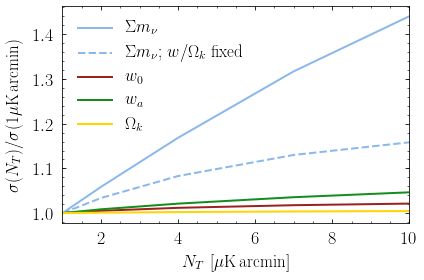

In [11]:
plt.figure(); ax=plt.gca();
ax.plot(st,mnu/mnu[0],'-',lw=2,color='#8BB8EC',label='$\\Sigma m_\\nu$')
ax.plot(st,mnu_nowok/mnu_nowok[0],'--',lw=2,color='#8BB8EC',label='$\\Sigma m_\\nu$; $w/\Omega_k$ fixed')
ax.plot(st, w0/w0[0] ,'-',lw=2,color='#9C2121',label='$w_0$')
ax.plot(st, wa/wa[0] ,'-',lw=2,color='#128D1E',label='$w_a$')
ax.plot(st, ok/ok[0] ,'-',lw=2,color='#FFD500',label='$\\Omega_k$')
ax.set_xlabel('$N_T\\,\\,[\\mu{\\rm K\\,arcmin}]$',fontsize=17)
ax.set_ylabel('$\\sigma(N_T)/\\sigma(1\\mu{\\rm K\\,arcmin})$',fontsize=17)
plt.xlim([1.,10])
plt.tight_layout()
plt.legend(loc='upper left',frameon=False,fontsize=17,ncol=1)
plt.savefig(plots_dir+'/mnu_st.pdf',bbox_inches='tight')

# Figure 1: Degradation when including DE and curvature with S4+DESI

In [12]:
parlist = []
parnames = []

fstr, fname = get_ini(desi=True,shear=False,red=False,blue=False,ok=False,w=False,m_bias=False, vary_baryons=False)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=True,shear=False,red=False,blue=False,ok=True,w=True,m_bias=False, vary_baryons=False)
parlist.append(fname)
parnames.append("Don't marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [13]:
pars=[com.ParamRun(parname) for parname in parlist]

for i in range(len(parlist)):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidTrueFalseFalseFalseFalseFalseFalseFalseTrueTrueTrue1.0
  - 0 (24) bins used (read) for galaxy clustering
  - 0 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 4 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy sh

/group/hepheno/heptools/anaconda3/envs/venv_py27/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


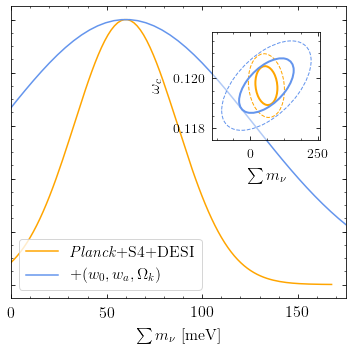

In [14]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)

cool_cols = np.array(["orange","cornflowerblue","lightcoral","goldenrod","orange","grey","chocolate","firebrick"])
mpl.rcParams['xtick.labelsize'] = label_size

labels = ['\emph{Planck}+S4+DESI','$+(w_0,w_a,\\Omega_k)$']

fsh.plot_fisher_single(pars[0].params_fshr,'mnu',[pars[i].fshr for i in range(len(pars))],ax,cool_cols,(len(pars))*[1.5],(len(pars))*["solid"],cool_cols,20,show_title=False,legend=True,labels=labels, unit="[meV]")

ax.set_xlim(0,175)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.yaxis.set_ticklabels([])
ax.legend(loc='lower left',fancybox=True,fontsize=16)


ax1=plt.axes([0.6, 0.6, .3, .3])
fsh.plot_fisher_two(pars[0].params_fshr,'mnu','och2',[pars[i].fshr for i in range(len(pars))],ax1,len(pars)*["none"],(len(pars))*[2],len(pars)*["solid"],cool_cols,3)
ax1.patch.set_alpha(0.5)

plt.tight_layout()
plt.savefig(plots_dir + "S4wok.pdf")

# Table 2: Fiducial forecasts

In [15]:
parlist = []
parnames = []

fstr, fname = get_ini(desi=False,shear=False,red=False,blue=False,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=True,shear=False,red=False,blue=False,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="nos4", desi=False,shear=False,red=False,blue=True,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="nos4", desi=False,shear=True,red=False,blue=False,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="nos4", desi=False,shear=True,red=False,blue=True,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [16]:
pars=[com.ParamRun(parname) for parname in parlist]
dict_test = []

for i in range(len(parlist)):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()
    dict_test.append(pars[i].get_params())

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidFalseFalseFalseFalseFalseFalseTrueTrueTrueTrueTrue1.0
  - 0 (24) bins used (read) for galaxy clustering
  - 0 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 4 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy she

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidFalseTrueFalseTrueFalseFalseTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 22 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shea

Fisher forecast :
 - tau = 6.0000E-02 +- 6.0115E-03(m) +- 2.7718E-04(f)
 - mnu = 6.0000E+01 +- 2.3692E+01(m) +- 1.3295E+00(f)
 - och2 = 1.1970E-01 +- 3.5280E-04(m) +- 3.3814E-05(f)
 - hh = 6.9000E-01 +- 1.9236E-03(m) +- 1.5935E-04(f)
 - obh2 = 2.2220E-02 +- 3.0137E-05(m) +- 1.2092E-05(f)
 - lksb = 1.7404E+00 +- 1.8890E-01(m) +- 6.9511E-02(f)
 - ns = 9.6550E-01 +- 1.7459E-03(m) +- 4.0239E-04(f)
 - A_s = 2.1955E+00 +- 2.3986E-02(m) +- 1.0132E-03(f)
 - lmcb = 1.4080E+01 +- 6.2219E-02(m) +- 1.1292E-02(f)
 - etab = 5.0000E-01 +- 2.3072E-02(m) +- 5.4281E-03(f)
 - abias_LSST_gold_sh_node1 = 7.8227E-01 +- 1.6431E-01(m) +- 1.1559E-01(f)
 - abias_LSST_gold_sh_node2 = 1.9187E+00 +- 1.8120E-01(m) +- 1.4047E-01(f)
 - abias_LSST_gold_sh_node3 = 5.7547E+00 +- 3.5233E-01(m) +- 2.8693E-01(f)
 - abias_LSST_gold_sh_node4 = 1.7002E+01 +- 1.2312E+00(m) +- 1.0511E+00(f)
 - bias_LSST_blue_cl_node1 = 1.2119E+00 +- 1.1223E-02(m) +- 4.2309E-03(f)
 - bias_LSST_blue_cl_node2 = 1.6192E+00 +- 1.1000E-02(m) +- 3.405

In [17]:
parlist = []
parnames = []

fstr, fname = get_ini(desi=False,shear=False,red=False,blue=False,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=True,shear=False,red=False,blue=False,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()



fstr, fname = get_ini(setup="nos4", desi=False,shear=False,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="nos4", desi=False,shear=True,red=False,blue=False,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="nos4", desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [18]:
pars=[com.ParamRun(parname) for parname in parlist]
dict_test_wok = []



for i in tqdm_notebook(range(len(parlist))):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()
    dict_test_wok.append(pars[i].get_params())

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidFalseFalseFalseFalseTrueTrueTrueTrueTrueTrueTrue1.0
  - 0 (24) bins used (read) for galaxy clustering
  - 0 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 4 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidFalseTrueFalseTrueTrueTrueTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 22 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear 

 
 
Fisher forecast :
 - tau = 6.0000E-02 +- 8.3215E-03(m) +- 2.7718E-04(f)
 - mnu = 6.0000E+01 +- 1.1098E+02(m) +- 1.6971E+00(f)
 - och2 = 1.1970E-01 +- 7.9566E-04(m) +- 4.2404E-05(f)
 - hh = 6.9000E-01 +- 1.6757E-01(m) +- 1.6887E-04(f)
 - obh2 = 2.2220E-02 +- 3.4038E-05(m) +- 1.2280E-05(f)
 - lksb = 1.7404E+00 +- 6.6113E+01(m) +- 1.8155E+00(f)
 - ns = 9.6550E-01 +- 2.3782E-03(m) +- 4.7364E-04(f)
 - A_s = 2.1955E+00 +- 3.6364E-02(m) +- 1.1700E-03(f)
 - lmcb = 1.4080E+01 +- 1.3138E+01(m) +- 7.7771E-02(f)
 - etab = 5.0000E-01 +- 3.2989E+00(m) +- 2.4012E-02(f)
 - ok = 0.0000E+00 +- 7.8858E-04(m) +- 3.7022E-05(f)
 - wa = 0.0000E+00 +- 2.4580E+00(m) +- 1.9351E-03(f)
 - w0 = -1.0000E+00 +- 1.1446E+00(m) +- 5.3150E-04(f)
 
 
Fisher forecast :
 - tau = 6.0000E-02 +- 7.2293E-03(m) +- 2.7718E-04(f)
 - mnu = 6.0000E+01 +- 7.6210E+01(m) +- 1.6970E+00(f)
 - och2 = 1.1970E-01 +- 7.2790E-04(m) +- 4.2386E-05(f)
 - hh = 6.9000E-01 +- 1.3241E-02(m) +- 1.6850E-04(f)
 - obh2 = 2.2220E-02 +- 3.2872E-05(m)

Fisher forecast :
 - tau = 6.0000E-02 +- 6.0936E-03(m) +- 2.7718E-04(f)
 - mnu = 6.0000E+01 +- 2.8504E+01(m) +- 1.3295E+00(f)
 - och2 = 1.1970E-01 +- 4.3397E-04(m) +- 3.3814E-05(f)
 - hh = 6.9000E-01 +- 1.3926E-02(m) +- 1.5935E-04(f)
 - obh2 = 2.2220E-02 +- 3.0404E-05(m) +- 1.2092E-05(f)
 - lksb = 1.7404E+00 +- 2.2494E-01(m) +- 6.9511E-02(f)
 - ns = 9.6550E-01 +- 1.9544E-03(m) +- 4.0239E-04(f)
 - A_s = 2.1955E+00 +- 2.4422E-02(m) +- 1.0132E-03(f)
 - lmcb = 1.4080E+01 +- 6.4087E-02(m) +- 1.1292E-02(f)
 - etab = 5.0000E-01 +- 2.5127E-02(m) +- 5.4281E-03(f)
 - ok = 0.0000E+00 +- 4.9254E-04(m) +- 3.6902E-05(f)
 - wa = 0.0000E+00 +- 3.1623E-01(m) +- 1.8073E-03(f)
 - w0 = -1.0000E+00 +- 1.2361E-01(m) +- 4.9891E-04(f)
 - abias_LSST_gold_sh_node1 = 7.8227E-01 +- 2.0137E-01(m) +- 1.1559E-01(f)
 - abias_LSST_gold_sh_node2 = 1.9187E+00 +- 2.0120E-01(m) +- 1.4047E-01(f)
 - abias_LSST_gold_sh_node3 = 5.7547E+00 +- 3.7279E-01(m) +- 2.8693E-01(f)
 - abias_LSST_gold_sh_node4 = 1.7002E+01 +- 1.2846E+00

In [19]:
title_str = ['\emph{Planck}+S4','( + DESI BAO)', 'LSST-clustering','LSST-shear','LSST-shear+clust','S4+LSST','CV+S4+LSST']

for title, dict, dict_wok in zip(title_str,dict_test, dict_test_wok):
    print title, '&', int(round(dict['mnu'],0)), '&', int(round(dict_wok['mnu'],0)), '&', round(dict_wok['ok']*1000,2), '&', round(dict_wok['w0'],2), '&', round(dict_wok['wa'],2), '\\\\'

\emph{Planck}+S4 & 73 & 111 & 0.79 & 1.14 & 2.46 \\
( + DESI BAO) & 29 & 76 & 0.48 & 0.13 & 0.41 \\
LSST-clustering & 95 & 97 & 4.99 & 0.63 & 2.28 \\
LSST-shear & 41 & 120 & 2.99 & 0.19 & 0.57 \\
LSST-shear+clust & 33 & 73 & 2.09 & 0.13 & 0.37 \\
S4+LSST & 24 & 29 & 0.49 & 0.12 & 0.32 \\


# Table 3: Impact of DESI BAO

In [20]:
parlist = []
parnames = []


fstr, fname = get_ini(setup="nos4", desi=True,shear=False,red=False,blue=True,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="nos4", desi=True,shear=True,red=False,blue=False,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="nos4", desi=True,shear=True,red=False,blue=True,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=True,shear=True,red=False,blue=True,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [21]:
pars=[com.ParamRun(parname) for parname in parlist]
dict_test = []

for i in tqdm_notebook(range(len(parlist))):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()
    dict_test.append(pars[i].get_params())

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_nos4TrueFalseFalseTrueFalseFalseTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 0 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 0 (1) bins used (read) for CMB lensing
  - 12 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy she

 
 
Fisher forecast :
 - tau = 6.0000E-02 +- 1.0610E-02(m) +- 6.8072E-04(f)
 - mnu = 6.0000E+01 +- 3.7375E+01(m) +- 3.3545E+00(f)
 - och2 = 1.1970E-01 +- 8.5050E-04(m) +- 1.2608E-04(f)
 - hh = 6.9000E-01 +- 3.1211E-03(m) +- 8.1458E-04(f)
 - obh2 = 2.2220E-02 +- 1.1621E-04(m) +- 6.0544E-05(f)
 - lksb = 1.7404E+00 +- 5.4119E+00(m) +- 6.2318E-01(f)
 - ns = 9.6550E-01 +- 3.6703E-03(m) +- 1.6227E-03(f)
 - A_s = 2.1955E+00 +- 4.6542E-02(m) +- 2.2805E-03(f)
 - lmcb = 1.4080E+01 +- 9.0916E+00(m) +- 6.9620E-01(f)
 - etab = 5.0000E-01 +- 1.6871E+00(m) +- 2.3362E-01(f)
 - bias_LSST_blue_cl_node1 = 1.2119E+00 +- 7.2396E-02(m) +- 7.4779E-03(f)
 - bias_LSST_blue_cl_node2 = 1.6192E+00 +- 7.1781E-02(m) +- 4.5336E-03(f)
 - bias_LSST_blue_cl_node3 = 2.0465E+00 +- 7.4905E-02(m) +- 4.1444E-03(f)
 - bias_LSST_blue_cl_node4 = 2.5575E+00 +- 8.7435E-02(m) +- 4.3410E-03(f)
 - bias_LSST_blue_cl_node5 = 3.1875E+00 +- 1.4174E-01(m) +- 8.6776E-03(f)
 - sphz_LSST_blue_cl_node0 = 5.4054E-02 +- 4.0434E-02(m) +- 2.622

In [22]:
parlist = []
parnames = []

fstr, fname = get_ini(setup="nos4", desi=True,shear=False,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="nos4", desi=True,shear=True,red=False,blue=False,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="nos4", desi=True,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=True,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [23]:
pars=[com.ParamRun(parname) for parname in parlist]
dict_test_wok = []

for i in tqdm_notebook(range(len(parlist))):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()
    dict_test_wok.append(pars[i].get_params())

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_nos4TrueFalseFalseTrueTrueTrueTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 0 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 0 (1) bins used (read) for CMB lensing
  - 12 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear

 
 
Fisher forecast :
 - tau = 6.0000E-02 +- 1.0653E-02(m) +- 6.8072E-04(f)
 - mnu = 6.0000E+01 +- 9.2405E+01(m) +- 3.3545E+00(f)
 - och2 = 1.1970E-01 +- 1.3954E-03(m) +- 1.2608E-04(f)
 - hh = 6.9000E-01 +- 1.3949E-02(m) +- 8.1458E-04(f)
 - obh2 = 2.2220E-02 +- 1.5920E-04(m) +- 6.0544E-05(f)
 - lksb = 1.7404E+00 +- 5.5933E+00(m) +- 6.2318E-01(f)
 - ns = 9.6550E-01 +- 4.2254E-03(m) +- 1.6227E-03(f)
 - A_s = 2.1955E+00 +- 4.6548E-02(m) +- 2.2805E-03(f)
 - lmcb = 1.4080E+01 +- 9.4029E+00(m) +- 6.9620E-01(f)
 - etab = 5.0000E-01 +- 1.7234E+00(m) +- 2.3362E-01(f)
 - ok = 0.0000E+00 +- 1.7957E-03(m) +- 1.8477E-04(f)
 - wa = 0.0000E+00 +- 4.4779E-01(m) +- 9.9973E-03(f)
 - w0 = -1.0000E+00 +- 1.4353E-01(m) +- 2.7308E-03(f)
 - bias_LSST_blue_cl_node1 = 1.2119E+00 +- 7.6414E-02(m) +- 7.4779E-03(f)
 - bias_LSST_blue_cl_node2 = 1.6192E+00 +- 7.5208E-02(m) +- 4.5336E-03(f)
 - bias_LSST_blue_cl_node3 = 2.0465E+00 +- 7.9693E-02(m) +- 4.1444E-03(f)
 - bias_LSST_blue_cl_node4 = 2.5575E+00 +- 9.7160E-02

In [24]:
title_str = ['LSST-clustering','LSST-shear','LSST-shear+clust','S4+LSST','CV+S4+LSST']

for title, dict, dict_wok in zip(title_str,dict_test, dict_test_wok):
    print title, '&', int(round(dict['mnu'],0)), '&', int(round(dict_wok['mnu'],0)), '&', round(dict_wok['ok']*1000,2), '&', round(dict_wok['w0'],2), '&', round(dict_wok['wa'],2), '\\\\'

LSST-clustering & 37 & 92 & 1.8 & 0.14 & 0.45 \\
LSST-shear & 32 & 100 & 1.45 & 0.12 & 0.38 \\
LSST-shear+clust & 27 & 68 & 1.25 & 0.1 & 0.3 \\
S4+LSST & 21 & 28 & 0.46 & 0.08 & 0.23 \\


# Table 4: Impact of CV measurement

In [25]:
parlist = []
parnames = []


fstr, fname = get_ini(setup="cvnos4", desi=False,shear=False,red=False,blue=True,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="cvnos4", desi=False,shear=True,red=False,blue=False,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="cvnos4", desi=False,shear=True,red=False,blue=True,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="cv", desi=False,shear=True,red=False,blue=True,ok=False,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [26]:
pars=[com.ParamRun(parname) for parname in parlist]
dict_test = []

for i in tqdm_notebook(range(len(parlist))):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()
    dict_test.append(pars[i].get_params())

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_cvnos4FalseFalseFalseTrueFalseFalseTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 0 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 0 (1) bins used (read) for CMB lensing
  - 12 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy 

 
 
Fisher forecast :
 - tau = 6.0000E-02 +- 2.6645E-03(m) +- 6.6059E-04(f)
 - mnu = 6.0000E+01 +- 9.4272E+01(m) +- 3.3554E+00(f)
 - och2 = 1.1970E-01 +- 1.3613E-03(m) +- 1.2654E-04(f)
 - hh = 6.9000E-01 +- 1.3483E-02(m) +- 8.5866E-04(f)
 - obh2 = 2.2220E-02 +- 1.5484E-04(m) +- 6.0574E-05(f)
 - lksb = 1.7404E+00 +- 5.4315E+00(m) +- 6.2318E-01(f)
 - ns = 9.6550E-01 +- 4.0490E-03(m) +- 1.6147E-03(f)
 - A_s = 2.1955E+00 +- 1.2730E-02(m) +- 2.2799E-03(f)
 - lmcb = 1.4080E+01 +- 9.0992E+00(m) +- 6.9620E-01(f)
 - etab = 5.0000E-01 +- 1.6858E+00(m) +- 2.3362E-01(f)
 - bias_LSST_blue_cl_node1 = 1.2119E+00 +- 7.2445E-02(m) +- 7.4779E-03(f)
 - bias_LSST_blue_cl_node2 = 1.6192E+00 +- 7.3728E-02(m) +- 4.5336E-03(f)
 - bias_LSST_blue_cl_node3 = 2.0465E+00 +- 7.7805E-02(m) +- 4.1444E-03(f)
 - bias_LSST_blue_cl_node4 = 2.5575E+00 +- 9.4462E-02(m) +- 4.3410E-03(f)
 - bias_LSST_blue_cl_node5 = 3.1875E+00 +- 1.5460E-01(m) +- 8.6776E-03(f)
 - sphz_LSST_blue_cl_node0 = 5.4054E-02 +- 4.0537E-02(m) +- 2.622

In [27]:
parlist = []
parnames = []

fstr, fname = get_ini(setup="cvnos4", desi=False,shear=False,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="cvnos4", desi=False,shear=True,red=False,blue=False,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="cvnos4", desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="cv",desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [28]:
pars=[com.ParamRun(parname) for parname in parlist]
dict_test_wok = []

for i in range(len(parlist)):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()
    dict_test_wok.append(pars[i].get_params())

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_cvnos4FalseFalseFalseTrueTrueTrueTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 0 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 0 (1) bins used (read) for CMB lensing
  - 12 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy sh

Fisher forecast :
 - tau = 6.0000E-02 +- 2.8525E-03(m) +- 6.6059E-04(f)
 - mnu = 6.0000E+01 +- 9.6464E+01(m) +- 3.3554E+00(f)
 - och2 = 1.1970E-01 +- 1.3997E-03(m) +- 1.2654E-04(f)
 - hh = 6.9000E-01 +- 1.2476E-01(m) +- 8.5866E-04(f)
 - obh2 = 2.2220E-02 +- 1.6067E-04(m) +- 6.0574E-05(f)
 - lksb = 1.7404E+00 +- 7.5022E+00(m) +- 6.2318E-01(f)
 - ns = 9.6550E-01 +- 4.1694E-03(m) +- 1.6147E-03(f)
 - A_s = 2.1955E+00 +- 1.3412E-02(m) +- 2.2799E-03(f)
 - lmcb = 1.4080E+01 +- 1.2954E+01(m) +- 6.9620E-01(f)
 - etab = 5.0000E-01 +- 2.2684E+00(m) +- 2.3362E-01(f)
 - ok = 0.0000E+00 +- 4.9706E-03(m) +- 1.8477E-04(f)
 - wa = 0.0000E+00 +- 2.1469E+00(m) +- 1.0167E-02(f)
 - w0 = -1.0000E+00 +- 6.1233E-01(m) +- 2.8099E-03(f)
 - bias_LSST_blue_cl_node1 = 1.2119E+00 +- 1.0646E-01(m) +- 7.4779E-03(f)
 - bias_LSST_blue_cl_node2 = 1.6192E+00 +- 1.3144E-01(m) +- 4.5336E-03(f)
 - bias_LSST_blue_cl_node3 = 2.0465E+00 +- 1.4658E-01(m) +- 4.1444E-03(f)
 - bias_LSST_blue_cl_node4 = 2.5575E+00 +- 1.4790E-01(m) 

In [29]:
title_str = ['LSST-clustering','LSST-shear','LSST-shear+clust','S4+LSST','CV+S4+LSST']

for title, dict, dict_wok in zip(title_str,dict_test, dict_test_wok):
    print title, '&', int(round(dict['mnu'],0)), '&', int(round(dict_wok['mnu'],0)), '&', round(dict_wok['ok']*1000,2), '&', round(dict_wok['w0'],2), '&', round(dict_wok['wa'],2), '\\\\'

LSST-clustering & 94 & 96 & 4.97 & 0.61 & 2.15 \\
LSST-shear & 31 & 117 & 2.82 & 0.18 & 0.55 \\
LSST-shear+clust & 25 & 73 & 2.01 & 0.13 & 0.35 \\
S4+LSST & 14 & 22 & 0.49 & 0.12 & 0.31 \\


## Tables 2,3,4 addendum: fix $w_0/w_a$

### Fiducal

In [30]:
parlist = []
parnames = []

fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=True,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [31]:
pars=[com.ParamRun(parname) for parname in parlist]
dict_test = []

for i in range(len(parlist)):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()
    dict_test.append(pars[i].get_params())

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidFalseTrueFalseTrueTrueFalseTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 22 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear

In [32]:
dict_test[0]['ok']*1000

0.48915737546739541

In [33]:
dict_test[0]['mnu']

24.116202489008344

### With DESI

In [34]:
parlist = []
parnames = []

fstr, fname = get_ini(desi=True,shear=True,red=False,blue=True,ok=True,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [35]:
pars=[com.ParamRun(parname) for parname in parlist]
dict_test = []

for i in range(len(parlist)):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()
    dict_test.append(pars[i].get_params())

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidTrueTrueFalseTrueTrueFalseTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 22 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear 

In [36]:
dict_test[0]['ok']*1000

0.44314574362070114

In [37]:
dict_test[0]['mnu']

22.40903654824379

### With CV

In [38]:
parlist = []
parnames = []

fstr, fname = get_ini(setup="cv",desi=False,shear=True,red=False,blue=True,ok=True,w=False,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [39]:
pars=[com.ParamRun(parname) for parname in parlist]
dict_test = []

for i in range(len(parlist)):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()
    dict_test.append(pars[i].get_params())

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_cvFalseTrueFalseTrueTrueFalseTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 22 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear 

In [40]:
dict_test[0]['ok']*1000

0.48850343149588998

In [41]:
dict_test[0]['mnu']

14.922739388283707

# Figure 2: Main plot: improvements with LSST

In [42]:
parlist = []
parnames = []

fstr, fname = get_ini(desi=False,shear=False,red=False,blue=False,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=True,shear=False,red=False,blue=False,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()



fstr, fname = get_ini(setup="nos4", desi=False,shear=True,red=False,blue=False,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="nos4", desi=False,shear=False,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(setup="nos4", desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [43]:
pars=[com.ParamRun(parname) for parname in parlist]

for i in range(len(parlist)):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidFalseFalseFalseFalseTrueTrueTrueTrueTrueTrueTrue1.0
  - 0 (24) bins used (read) for galaxy clustering
  - 0 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 4 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidFalseTrueFalseTrueTrueTrueTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 22 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear 

Fisher forecast :
 - tau = 6.0000E-02 +- 6.0936E-03(m) +- 2.7718E-04(f)
 - mnu = 6.0000E+01 +- 2.8504E+01(m) +- 1.3295E+00(f)
 - och2 = 1.1970E-01 +- 4.3397E-04(m) +- 3.3814E-05(f)
 - hh = 6.9000E-01 +- 1.3926E-02(m) +- 1.5935E-04(f)
 - obh2 = 2.2220E-02 +- 3.0404E-05(m) +- 1.2092E-05(f)
 - lksb = 1.7404E+00 +- 2.2494E-01(m) +- 6.9511E-02(f)
 - ns = 9.6550E-01 +- 1.9544E-03(m) +- 4.0239E-04(f)
 - A_s = 2.1955E+00 +- 2.4422E-02(m) +- 1.0132E-03(f)
 - lmcb = 1.4080E+01 +- 6.4087E-02(m) +- 1.1292E-02(f)
 - etab = 5.0000E-01 +- 2.5127E-02(m) +- 5.4281E-03(f)
 - ok = 0.0000E+00 +- 4.9254E-04(m) +- 3.6902E-05(f)
 - wa = 0.0000E+00 +- 3.1623E-01(m) +- 1.8073E-03(f)
 - w0 = -1.0000E+00 +- 1.2361E-01(m) +- 4.9891E-04(f)
 - abias_LSST_gold_sh_node1 = 7.8227E-01 +- 2.0137E-01(m) +- 1.1559E-01(f)
 - abias_LSST_gold_sh_node2 = 1.9187E+00 +- 2.0120E-01(m) +- 1.4047E-01(f)
 - abias_LSST_gold_sh_node3 = 5.7547E+00 +- 3.7279E-01(m) +- 2.8693E-01(f)
 - abias_LSST_gold_sh_node4 = 1.7002E+01 +- 1.2846E+00

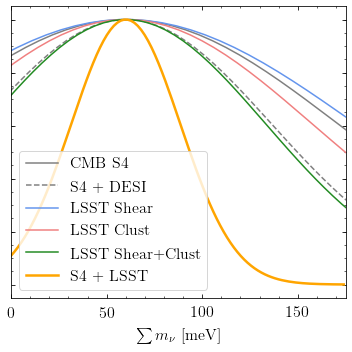

In [44]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1)

cool_cols = np.array(["grey","grey","cornflowerblue","lightcoral","forestgreen","orange","grey","chocolate","firebrick"])
# mpl.rcParams['xtick.labelsize'] = label_size

labels = ['CMB S4','S4 + DESI','LSST Shear','LSST Clust','LSST Shear+Clust','S4 + LSST']

fsh.plot_fisher_single(pars[0].params_fshr,'mnu',[pars[i].fshr for i in range(len(pars))],ax,cool_cols,[1.5,1.5,1.5,1.5,1.5,2.5],["solid","dashed","solid","solid","solid","solid"],cool_cols,20,show_title=False,legend=True,labels=labels, unit='[meV]')

ax.set_xlim(0,175)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.yaxis.set_ticklabels([])
ax.legend(loc='lower left',fancybox=True,fontsize=16)

plt.tight_layout()
plt.savefig(plots_dir + "complementarity.pdf")

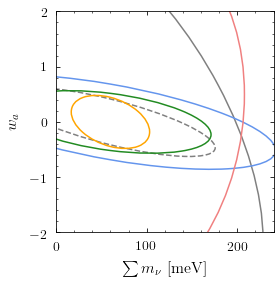

In [45]:
# cool_cols = np.array(["grey","cornflowerblue","lightcoral","forestgreen","orange","firebrick"])

# ax = plt.axes()
fig, ax = plt.subplots(figsize=(4, 4))
fsh.plot_fisher_two(pars[0].params_fshr,"mnu","wa",[pars[i].fshr for i in range(len(pars))],ax,(len(pars))*["none"],(len(pars))*[1.5],
                           ["solid","dashed","solid","solid","solid","solid"],cool_cols,1.8,#[col_idx],
                   units=['[meV]',''], plot_2s=False)
plt.tight_layout()

plt.xlim(0,240)
plt.ylim(-2,2)

plt.savefig(plots_dir + "wamnu.pdf")

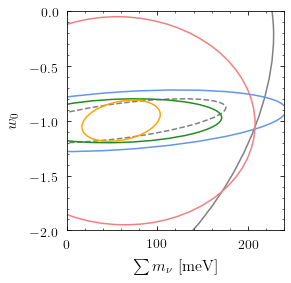

In [46]:
# cool_cols = np.array(["grey","cornflowerblue","lightcoral","forestgreen","orange","firebrick"])

# ax = plt.axes()
fig, ax = plt.subplots(figsize=(4, 4))
fsh.plot_fisher_two(pars[0].params_fshr,"mnu","w0",[pars[i].fshr for i in range(len(pars))],ax,(len(pars))*["none"],(len(pars))*[1.5],
                           ["solid","dashed","solid","solid","solid","solid"],cool_cols,1.8,#[col_idx],
                   units=['[meV]',''], plot_2s=False)
plt.tight_layout()
plt.xlim(0,240)
plt.ylim(-2,0)



plt.savefig(plots_dir + "w0mnu.pdf")

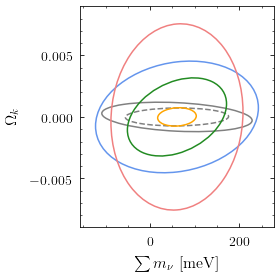

In [47]:
# cool_cols = np.array(["grey","cornflowerblue","lightcoral","forestgreen","orange","firebrick"])

# ax = plt.axes()
fig, ax = plt.subplots(figsize=(4, 4))
fsh.plot_fisher_two(pars[0].params_fshr,"mnu","ok",[pars[i].fshr for i in range(len(pars))],ax,(len(pars))*["none"],(len(pars))*[1.5],
                           ["solid","dashed","solid","solid","solid","solid"],cool_cols,1.8,#[col_idx],
                   units=['[meV]',''], plot_2s=False)
plt.tight_layout()
# plt.xlim(0,240)
# plt.ylim(-2,0)



plt.savefig(plots_dir + "okmnu.pdf")

# Figure 6: Multiplication bias self-calibration

In [48]:
class Dummy():
    def __init__(self):
        pass

In [49]:
new_pars = [Dummy() for _ in range(pars[0].npar_mbias)]
for i in range(len(new_pars)):
    new_pars[i].name = "m"+str(i)
    new_pars[i].do_plot = True
    new_pars[i].val = 0.
    new_pars[i].label = "$m_"+str(i)+"$"

In [50]:
m_params_to_plot = ["m"+str(i) for i in range(9)]

In [51]:
pars = np.array(pars)

In [52]:
zbins = np.loadtxt("../curves_LSST/bins_gold.txt", unpack=True)
z0 = zbins[0]
zf = zbins[1]
(z0+zf)/2
label1 = [str(np.round(i,3))[:4] for i in (z0+zf)/2]

In [53]:
mbias_list = [dict_test_wok[-1]['m'+str(i)] for i in range(9)]
mbias_fid = [0 for i in range(9)]
x = [i for i in range(9)]
x1 = np.arange(-0.5,9.,1)
label2 = ["$m_"+str(i)+"$" for i in range(9)]

In [54]:
label = [j for i,j in zip(label1, label2)]

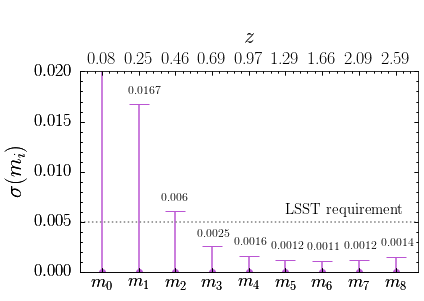

In [55]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

ax = host_subplot(111, axes_class=AA.Axes)

ax.errorbar(x, mbias_fid, yerr=mbias_list, fmt='o', capsize=10, color='mediumorchid')
ax.set_ylim(-0.02,0.02)
ax.set_xticks(x, label);
ax.set_ylabel("$\sigma(m_i)$")
ax.axhline(0, color='purple', alpha=0.2, lw=1)
# plt.yscale("log")

ax2 = ax.twin()  

ax.set_xticks(x)
ax.set_xticklabels(label)

ax2.set_xticks(np.array(x1)[::2])
ax2.set_xticklabels([str(np.abs(np.round(i,3)))[:4] for i in np.array(list(z0)+[zf[-1]])[::2]])

ax2.set_xticks(x)
ax2.set_xticklabels(label1)


ax2.axis["top"].major_ticklabels.set_visible(True)
ax2.axis["right"].major_ticklabels.set_visible(False)

ax.tick_params(axis='x', pad=2000)

ax2.set_xlabel("$z$")

for i in range(1,2):
    plt.text(i-0.3,mbias_list[i]+0.001, np.round(mbias_list[i],4), rotation=0, fontsize=12)



for i in range(2,len(mbias_list)):
    plt.text(i-0.4,mbias_list[i]+0.001, np.round(mbias_list[i],4), rotation=0, fontsize=12)
    
plt.axhline(0.005, ls='dotted', color='grey', label="LSST requirement")
plt.text(5., 0.0057, "LSST requirement", fontsize=15)

plt.xlim(-0.6,8.6)
plt.ylim(0,0.02)
plt.tight_layout()
# plt.legend(frameon=False, loc='upper right')
plt.savefig(plots_dir + "multbias.pdf")

# Figure 5: Effect of systematics

In [5]:
parlist = []
parnames = []

fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True, shear_lmax5000=False)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=False,shear=True,red=True,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True, photoz=False)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=False)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=False, vary_baryons=True)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

fstr, fname = get_ini(desi=False,shear=True,red=False,blue=True,ok=True,w=True,m_bias=True, vary_baryons=True, IA_marg=False)
parlist.append(fname)
parnames.append("Marginalize over baryons")
f=open(fname, "w")
f.write(fstr)
f.close()

In [6]:
dict_test_wok = []

pars=[com.ParamRun(parname) for parname in parlist]

for i in range(len(parlist)):
#     pars[i] = com.ParamRun(parlist[i])
    print " "
    if (not os.path.isfile(pars[i].output_dir+"/"+pars[i].output_fisher+"/fisher_raw.npz")) :
        print "<> Computing/reading relevant signal power spectra"
        pars[i].get_cls_all()

        if pars[i].just_run_cls==False :
            print "<> Computing relevant noise power spectra"
            pars[i].get_cls_noise()
            print " "
#             pars[i].plot_cls_params()
    print " "
    pars[i].get_fisher_cls()
    pars[i].get_fisher_bao()
    pars[i].get_fisher_prior()
    pars[i].join_fishers()
    pars[i].plot_fisher()

    dict_test_wok.append(pars[i].get_params())

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidFalseTrueFalseTrueTrueTrueTrueTrueTrueTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 22 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear 

Adding prior on photo-z bias
Adding prior on photo-z bias
Adding prior on photo-z bias
 <><> Run parameters
  - Overall l_max = 5000
  - LSS l_max = 5000
  - CMB l_max = 5000
  - Output directory : ../outputs_LSST_DESI_lmax5000_IAFix/
  - Output spectra : ../outputs_LSST_DESI_lmax5000_IAFix//run
  - Output Fisher : FisherDellaIAFixedBaryons_fidFalseTrueFalseTrueTrueTrueTrueTrueFalseTrueTrue1.0
  - 9 (24) bins used (read) for galaxy clustering
  - 9 (9) bins used (read) for galaxy shear
  - 3 (3) bins used (read) for CMB primary
  - 1 (1) bins used (read) for CMB lensing
  - 22 bins used in total
  - 5 tracers read : 
     1. CMB_exp. Type: cmb_primary, 3 bins.
     2. CMB_exp_lensing. Type: cmb_lensing, 1 bins.
     3. LSST_gold_sh. Type: gal_shear, 9 bins.
     4. LSST_blue_cl. Type: gal_clustering, 9 bins.
     5. LSST_red_cl. Type: gal_clustering, 15 bins.
  - Overlaping sky fraction : 0.400
  - Terms included for galaxy clustering : density, rsd1
  - Terms included for galaxy shear

Fisher forecast :
 - tau = 6.0000E-02 +- 6.0936E-03(m) +- 2.7718E-04(f)
 - mnu = 6.0000E+01 +- 2.8504E+01(m) +- 1.3295E+00(f)
 - och2 = 1.1970E-01 +- 4.3397E-04(m) +- 3.3814E-05(f)
 - hh = 6.9000E-01 +- 1.3926E-02(m) +- 1.5935E-04(f)
 - obh2 = 2.2220E-02 +- 3.0404E-05(m) +- 1.2092E-05(f)
 - lksb = 1.7404E+00 +- 2.2494E-01(m) +- 6.9511E-02(f)
 - ns = 9.6550E-01 +- 1.9544E-03(m) +- 4.0239E-04(f)
 - A_s = 2.1955E+00 +- 2.4422E-02(m) +- 1.0132E-03(f)
 - lmcb = 1.4080E+01 +- 6.4087E-02(m) +- 1.1292E-02(f)
 - etab = 5.0000E-01 +- 2.5127E-02(m) +- 5.4281E-03(f)
 - ok = 0.0000E+00 +- 4.9254E-04(m) +- 3.6902E-05(f)
 - wa = 0.0000E+00 +- 3.1623E-01(m) +- 1.8073E-03(f)
 - w0 = -1.0000E+00 +- 1.2361E-01(m) +- 4.9891E-04(f)
 - abias_LSST_gold_sh_node1 = 7.8227E-01 +- 2.0137E-01(m) +- 1.1559E-01(f)
 - abias_LSST_gold_sh_node2 = 1.9187E+00 +- 2.0120E-01(m) +- 1.4047E-01(f)
 - abias_LSST_gold_sh_node3 = 5.7547E+00 +- 3.7279E-01(m) +- 2.8693E-01(f)
 - abias_LSST_gold_sh_node4 = 1.7002E+01 +- 1.2846E+00

Fisher forecast :
 - tau = 6.0000E-02 +- 5.9075E-03(m) +- 2.7718E-04(f)
 - mnu = 6.0000E+01 +- 2.6881E+01(m) +- 1.3295E+00(f)
 - och2 = 1.1970E-01 +- 4.2440E-04(m) +- 3.3814E-05(f)
 - hh = 6.9000E-01 +- 4.5279E-03(m) +- 1.5935E-04(f)
 - obh2 = 2.2220E-02 +- 3.0254E-05(m) +- 1.2092E-05(f)
 - lksb = 1.7404E+00 +- 1.9647E-01(m) +- 6.9511E-02(f)
 - ns = 9.6550E-01 +- 1.9434E-03(m) +- 4.0239E-04(f)
 - A_s = 2.1955E+00 +- 2.3563E-02(m) +- 1.0132E-03(f)
 - lmcb = 1.4080E+01 +- 6.2405E-02(m) +- 1.1292E-02(f)
 - etab = 5.0000E-01 +- 2.3267E-02(m) +- 5.4281E-03(f)
 - ok = 0.0000E+00 +- 4.8685E-04(m) +- 3.6902E-05(f)
 - wa = 0.0000E+00 +- 1.4489E-01(m) +- 1.8073E-03(f)
 - w0 = -1.0000E+00 +- 4.8809E-02(m) +- 4.9891E-04(f)
 - abias_LSST_gold_sh_node1 = 7.8227E-01 +- 1.5816E-01(m) +- 1.1559E-01(f)
 - abias_LSST_gold_sh_node2 = 1.9187E+00 +- 1.7597E-01(m) +- 1.4047E-01(f)
 - abias_LSST_gold_sh_node3 = 5.7547E+00 +- 3.4384E-01(m) +- 2.8693E-01(f)
 - abias_LSST_gold_sh_node4 = 1.7002E+01 +- 1.1683E+00

In [7]:
yticks = ["Fiducial", "Shear $\ell_\mathrm{max}= 2000", "Red sample", "No photo-$z$ marg.", "No baryon marg.", "No $m$-bias","No IA marg."]

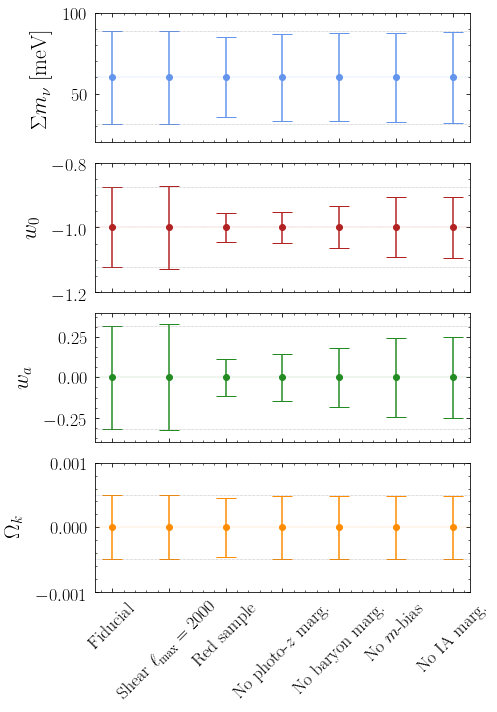

In [8]:
# Simple data to display in various forms
mnu_fid =  [60 for i in range(len(dict_test_wok))]
w0_fid =  [-1 for i in range(len(dict_test_wok))]
wa_fid =  [0 for i in range(len(dict_test_wok))]
ok_fid =  [0 for i in range(len(dict_test_wok))]


x = range(len(dict_test_wok))

mnu_sys = [dict_test_wok[i]['mnu'] for i in range(len(dict_test_wok))]
w0_sys = [dict_test_wok[i]['w0'] for i in range(len(dict_test_wok))]
wa_sys = [dict_test_wok[i]['wa'] for i in range(len(dict_test_wok))]
ok_sys = [dict_test_wok[i]['ok'] for i in range(len(dict_test_wok))]




# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=False,figsize=(7,10))
ax1.errorbar(x, mnu_fid, yerr=mnu_sys, fmt='o', capsize=10)
ax1.set_ylim(60-40,60+40)
# ax1.set_title('Systematics')
ax1.set_ylabel("$\Sigma m_\\nu$ [meV]")
ax1.axhline(60, color='cornflowerblue', lw=0.2, ls='--')
ax1.axhline(mnu_fid[0]+mnu_sys[0], color='grey', lw=0.5, ls='dotted')
ax1.axhline(mnu_fid[0]-mnu_sys[0], color='grey', lw=0.5, ls='dotted')




ax2.errorbar(x, w0_fid, yerr=w0_sys, fmt='o', color='firebrick', capsize=10)
ax2.set_ylim(-1-0.2,-1+0.2)
ax2.set_ylabel("$w_0$")
ax2.axhline(-1, color='firebrick', lw=0.2, ls='--')
ax2.axhline(w0_fid[0]+w0_sys[0], color='grey', lw=0.5, ls='dotted')
ax2.axhline(w0_fid[0]-w0_sys[0], color='grey', lw=0.5, ls='dotted')


ax3.errorbar(x, wa_fid, yerr=wa_sys, fmt='o', color='forestgreen', capsize=10)
ax3.set_ylim(0-0.4,0+0.4)
ax3.set_ylabel("$w_a$")
ax3.axhline(0, color='forestgreen', lw=0.2, ls='--')
ax3.axhline(wa_fid[0]+wa_sys[0], color='grey', lw=0.5, ls='dotted')
ax3.axhline(wa_fid[0]-wa_sys[0], color='grey', lw=0.5, ls='dotted')




ax4.errorbar(x, ok_fid, yerr=ok_sys, fmt='o', color='darkorange', capsize=10)
ax4.set_ylim(0-0.001,0+0.001)
ax4.set_ylabel("$\Omega_k$")
ax4.axhline(0, color='darkorange', lw=0.2, ls='--')
ax4.axhline(ok_fid[0]+ok_sys[0], color='grey', lw=0.5, ls='dotted')
ax4.axhline(ok_fid[0]-ok_sys[0], color='grey', lw=0.5, ls='dotted')




ax4.set_xticks(x)
ax4.set_xticklabels(yticks, rotation=45)

f.subplots_adjust(hspace=.2)

plt.tight_layout()
plt.savefig(plots_dir + "systematics.pdf")